
[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


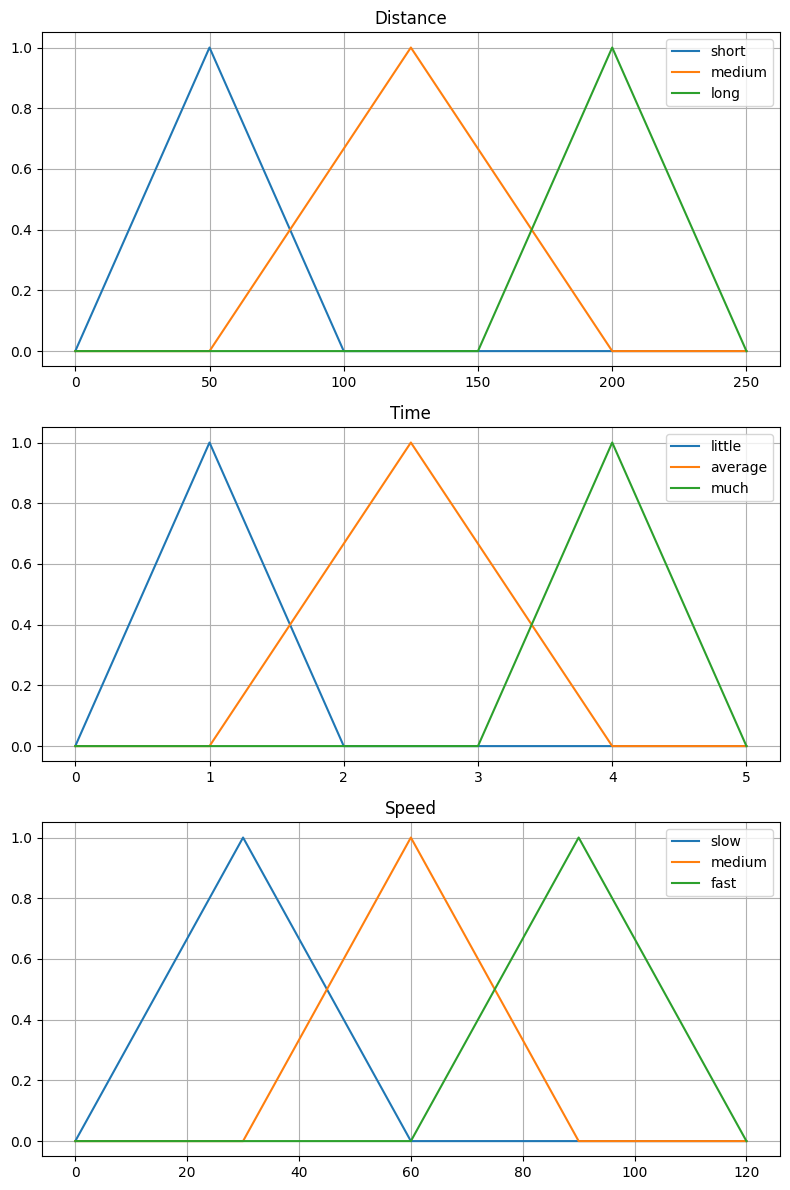

In [9]:
!pip install networkx numpy matplotlib scikit-fuzzy
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Лингвистические переменные
distance = ctrl.Antecedent(np.arange(0, 251, 1), 'distance')
time = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'time')
speed = ctrl.Consequent(np.arange(0, 121, 1), 'speed')

# Функции принадлежности для "расстояние"
distance['short'] = fuzz.trimf(distance.universe, [0, 50, 100])
distance['medium'] = fuzz.trimf(distance.universe, [50, 125, 200])
distance['long'] = fuzz.trimf(distance.universe, [150, 200, 250])

# Функции принадлежности для "время"
time['little'] = fuzz.trimf(time.universe, [0, 1, 2])
time['average'] = fuzz.trimf(time.universe, [1, 2.5, 4])
time['much'] = fuzz.trimf(time.universe, [3, 4, 5])

# Функции принадлежности для "скорость"
speed['slow'] = fuzz.trimf(speed.universe, [0, 30, 60])
speed['medium'] = fuzz.trimf(speed.universe, [30, 60, 90])
speed['fast'] = fuzz.trimf(speed.universe, [60, 90, 120])

# Графики функций принадлежности
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

axs[0].plot(distance.universe, distance['short'].mf, label='short')
axs[0].plot(distance.universe, distance['medium'].mf, label='medium')
axs[0].plot(distance.universe, distance['long'].mf, label='long')
axs[0].set_title('Distance')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(time.universe, time['little'].mf, label='little')
axs[1].plot(time.universe, time['average'].mf, label='average')
axs[1].plot(time.universe, time['much'].mf, label='much')
axs[1].set_title('Time')
axs[1].legend()
axs[1].grid(True)

axs[2].plot(speed.universe, speed['slow'].mf, label='slow')
axs[2].plot(speed.universe, speed['medium'].mf, label='medium')
axs[2].plot(speed.universe, speed['fast'].mf, label='fast')
axs[2].set_title('Speed')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


In [16]:
# Повторный импорт и выполнение после сброса окружения

import numpy as np

# Входные данные
S = 200  # расстояние в км
t = 4    # время в часах

# Универсум значений
speed_range = np.arange(0, 121, 1)

# Приближённые функции принадлежности
def triangle(x, a, b, c):
    return np.maximum(0, np.minimum((x - a)/(b - a + 1e-9), (c - x)/(c - b + 1e-9)))

# Степени принадлежности для входных значений
def distance_membership(s):
    return {
        'short': triangle(s, 0, 62.5, 125),
        'medium': triangle(s, 62.5, 125, 187.5),
        'long': triangle(s, 125, 187.5, 250),
    }

def time_membership(t):
    return {
        'little': triangle(t, 0, 1.25, 2.5),
        'average': triangle(t, 1.25, 2.5, 3.75),
        'much': triangle(t, 2.5, 3.75, 5),
    }

# Правила нечеткой логики (таблица соответствий)
rules = {
    ('short', 'much'): 'slow',
    ('short', 'average'): 'slow',
    ('short', 'little'): 'medium',
    ('medium', 'much'): 'slow',
    ('medium', 'average'): 'medium',
    ('medium', 'little'): 'fast',
    ('long', 'much'): 'medium',
    ('long', 'average'): 'fast',
    ('long', 'little'): 'fast',
}

# Функции принадлежности выходных значений скорости
def speed_mf(label, x):
    if label == 'slow':
        return triangle(x, 0, 30, 60)
    elif label == 'medium':
        return triangle(x, 30, 60, 90)
    elif label == 'fast':
        return triangle(x, 60, 90, 120)
    return 0

# Получение степеней принадлежности входных значений
d_membership = distance_membership(S)
t_membership = time_membersment = time_membership(t)

# Агрегация по правилам
aggregated_speed_mf = np.zeros_like(speed_range, dtype=float)
for (d_label, t_label), speed_label in rules.items():
    activation = min(d_membership[d_label], t_membership[t_label])
    aggregated_speed_mf = np.maximum(aggregated_speed_mf,
                                     np.minimum(activation, [speed_mf(speed_label, x) for x in speed_range]))

# Дефаззификация методом центра тяжести (центроид)
defuzzified_speed = np.sum(aggregated_speed_mf * speed_range) / np.sum(aggregated_speed_mf)

defuzzified_speed


np.float64(60.0)